In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/Kaggle_Dataset/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                       Vehicle Sales Data                        19MB  2024-02-21 20:16:17          18120        324  1.0              
sudarshan24byte/online-food-dataset                      Online Food Dataset                        3KB  2024-03-02 18:50:30           7908        136  0.9411765        
murilozangari/jobs-and-salaries-in-data-field-2024       Jobs and Salaries in Data field 2024     127KB  2024-03-18 18:15:53           1282         24  0.9411765        
ayushparwal2026/cars-dataset                             Cars Dataset                             169KB  2024-03-11 16:23:49           1807         30

In [ ]:
!kaggle datasets download -d fournierp/captcha-version-2-images

 29% 5.00M/17.4M [00:00<00:00, 35.4MB/s]
100% 17.4M/17.4M [00:00<00:00, 75.9MB/s]


In [ ]:
!unzip captcha-version-2-images.zip

Archive:  captcha-version-2-images.zip
  inflating: samples/226md.png       
  inflating: samples/22d5n.png       
  inflating: samples/2356g.png       
  inflating: samples/23mdg.png       
  inflating: samples/23n88.png       
  inflating: samples/243mm.png       
  inflating: samples/244e2.png       
  inflating: samples/245y5.png       
  inflating: samples/24f6w.png       
  inflating: samples/24pew.png       
  inflating: samples/25257.png       
  inflating: samples/253dc.png       
  inflating: samples/25egp.png       
  inflating: samples/25m6p.png       
  inflating: samples/25p2m.png       
  inflating: samples/25w53.png       
  inflating: samples/264m5.png       
  inflating: samples/268g2.png       
  inflating: samples/28348.png       
  inflating: samples/28x47.png       
  inflating: samples/2b827.png       
  inflating: samples/2bg48.png       
  inflating: samples/2cegf.png       
  inflating: samples/2cg58.png       
  inflating: samples/2cgyx.png       
  inflating

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # graphics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
filelist = []

import os
for dirname, _, filenames in os.walk('/content/samples'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        filelist.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from PIL import Image
labels = []
images = []

In [ ]:
for image_path in filelist:
    image = Image.open(image_path)
    image = image.convert('RGB') #Removing Transparency Channel from PNG(To match dimensions with some JPG images)
    image = np.array(image)
    image = image/255 #Normalization

    image_label = image_path.split("/")[-1].split(".")[0]

    images.append(image)
    labels.append(image_label)

In [ ]:
images = np.stack(images)
print(images.shape)

(2140, 50, 200, 3)


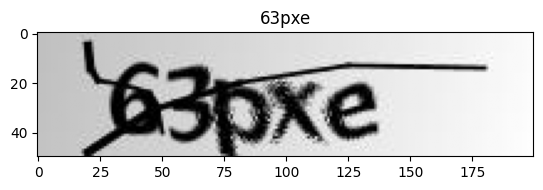

[[[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 [[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 [[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 ...

 [[0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]


In [ ]:
plt.imshow(images[19])
plt.title(labels[19])
plt.axis('on')  # Turn off axis labels
plt.show()

print(images[19])

In [ ]:
def one_hot_encode(characters, char_pool):
    char_to_index = {char: i for i, char in enumerate(char_pool)}
    num_classes = len(char_pool)
    encoding_size = len(characters[0])

    one_hot_encoded = np.zeros((len(characters), encoding_size, num_classes), dtype=int)

    for i, word in enumerate(characters):
        for j, char in enumerate(word):
            index = char_to_index[char]
            one_hot_encoded[i, j, index] = 1

    return one_hot_encoded

# Character pool: digits 0-9 and lowercase letters a-z
char_pool = '0123456789abcdefghijklmnopqrstuvwxyz'

# List of 5-letter strings
strings_list = ["abdy6", "ajyt8"]

# One-hot encode the list
one_hot_encoded = one_hot_encode(strings_list, char_pool)

# Print the one-hot encoded representation
print("One-Hot Encoded:")
print(one_hot_encoded)

One-Hot Encoded:
[[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   0]
  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]]

 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]]]


In [ ]:
encoded_labels = one_hot_encode(labels, char_pool)
encoded_labels = np.array(encoded_labels)
encoded_labels.shape, encoded_labels

((2140, 5, 36),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 1, 0],
         [0, 0, 0, ..., 1, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
  

In [ ]:
indices = np.random.permutation(len(labels))

images = images[indices]
encoded_labels = encoded_labels[indices]

images.shape, encoded_labels.shape

((2140, 50, 200, 3), (2140, 5, 36))

In [ ]:
split_index = int(len(labels) * 0.9)

train_labels = encoded_labels[:split_index]
val_labels = encoded_labels[split_index:]

train_images = images[:split_index]
val_images = images[split_index:]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 198, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 46, 64)         36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5 * 36, activation='softmax'))

model.add(layers.Reshape((5, 36)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 198, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 46, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 26496)             0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(val_images, val_labels))

Epoch 1/15
61/61 [==============================] - 33s 506ms/step - loss: 3.0755 - accuracy: 0.1131 - val_loss: 2.5800 - val_accuracy: 0.2121
Epoch 2/15
61/61 [==============================] - 33s 538ms/step - loss: 1.9988 - accuracy: 0.3963 - val_loss: 1.6559 - val_accuracy: 0.4832
Epoch 3/15
61/61 [==============================] - 33s 538ms/step - loss: 1.1325 - accuracy: 0.6518 - val_loss: 1.0843 - val_accuracy: 0.6654
Epoch 4/15
61/61 [==============================] - 31s 511ms/step - loss: 0.6560 - accuracy: 0.7972 - val_loss: 0.7621 - val_accuracy: 0.7626
Epoch 5/15
61/61 [==============================] - 32s 520ms/step - loss: 0.3915 - accuracy: 0.8742 - val_loss: 0.6427 - val_accuracy: 0.7991
Epoch 6/15
61/61 [==============================] - 31s 510ms/step - loss: 0.2737 - accuracy: 0.9142 - val_loss: 0.5486 - val_accuracy: 0.8346
Epoch 7/15
61/61 [==============================] - 31s 510ms/step - loss: 0.2140 - accuracy: 0.9322 - val_loss: 0.5320 - val_accuracy: 0.8486

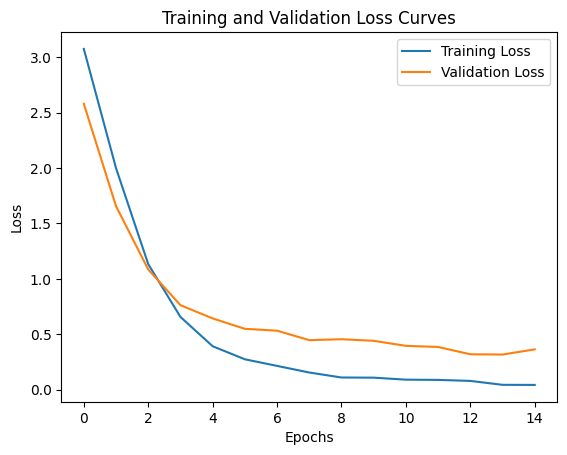

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Plot both training and validation loss curves
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()